In [170]:
import sys
sys.path.append("/home/ex/Documents/Hons/CBT/Skogestad-Python")
import utils
import numpy
import matplotlib.pyplot as plt
import scipy.linalg
import harold
import statsmodels

### Defining the TF
(see H/W assignment 9)

In [171]:
# Origional system
# num = [[[-0.045], [-0.048]], [[-0.23], [0.55]]]
# den = [[[8.1, 1], [11, 1]], [[8.1, 1], [10, 1]]]
# delay = [[0.5, 0.5], [1.5, 0.5]]
# G = utils.InternalDelay.from_tf_coefficients(num, den, delay)

In [172]:
# Integrator in 0, 0 element
num = [[[-0.045], [-0.048]], [[-0.23], [0.55]]]
den = [[[8.1, 1], [11, 1]], [[8.1, 1], [10, 1]]]
delay = [[0.5, 0.5], [1.5, 0.5]]
G = utils.InternalDelay.from_tf_coefficients(num, den, delay)

In [144]:
bcs, acs = [list(a[0]) for a in harold.discretize(harold.Transfer([-0.045], [8.1, 1]), dt=1, method='zoh').polynomials]
acs, bcs

([1.0, -0.8838598318931836], [-0.005226307564806744])

### Test step response model

In [145]:
dt = 1

P = 100
M = 20

In [146]:
col = [0] + acs + [0]*(P-len(acs)-1)
row = [0]*P
A = scipy.linalg.toeplitz(col, row)

len(col), len(row), A.shape

(100, 100, (100, 100))

In [147]:
col = bcs + [0]*(P-len(bcs))
row = [bcs[0]] + [0]*(M-1)
B = scipy.linalg.toeplitz(col, row)

len(col), len(row), B.shape

(100, 20, (100, 20))

In [148]:
# dU = [-1.5]*10 + [2]*7 + [0]*3
dU = [1] + [0]*9 + [-1] + [0]*9
len(dU)

20

In [149]:
U = numpy.cumsum(dU)

In [150]:
y = numpy.linalg.inv(numpy.eye(P) - A) @ B @ U
t = numpy.arange(0, P*dt, dt)
y.shape, t.shape

((100,), (100,))

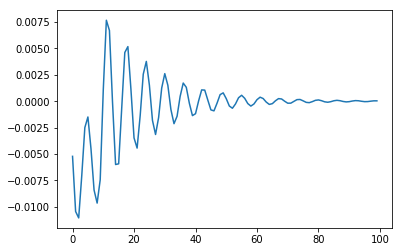

In [151]:
plt.plot(t, y)
plt.show()

In [152]:
numpy.cumsum(dU)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

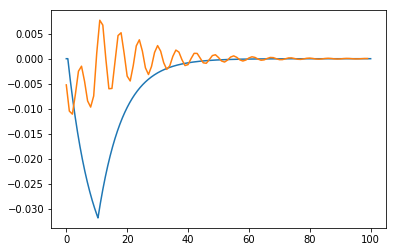

In [153]:
def uf(t):
    if t < len(dU)*dt:
        return [numpy.cumsum(dU)[numpy.where(tstep <= t)[0][-1]], 0]
    else:
        return [numpy.cumsum(dU)[-1], 0]
ts = numpy.linspace(0 , dt*P, 1000)


tstep = numpy.arange(0, P*dt, dt)

ys = G.simulate(uf, ts)

plt.plot(ts, ys[:, 0])
plt.plot(t, y)
plt.show()

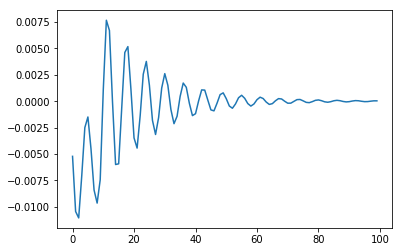

In [169]:
ypred = []
ypast = [0]*len(acs)
upast = [0]*len(bcs)

for ti in t:
    upast.pop()
    upast = [uf(ti)[0]] + upast
#     print(numpy.dot(acs, ypast), numpy.dot(bcs, upast))
    yi = numpy.dot(acs, ypast) + numpy.dot(bcs, upast)
    ypred.append(yi)
    ypast.pop()
    ypast = [yi] + ypast
    
plt.plot(t, ypred)
plt.show()

In [156]:
[1,2,3].pop()

3